In [1]:
import pandas as pd
import numpy as np

import requests

from xml.etree import ElementTree

import folium
import folium.plugins
folium.plugins.MarkerCluster()

import matplotlib.pyplot as plt
import seaborn as sns

#!pip install geopy
import geocoder
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")

In [2]:
import chart_studio.plotly as py
import chart_studio

import plotly.graph_objects as go
chart_studio.tools.set_credentials_file(username='MayGodoy', api_key='VJXiVW1wvAUNAQ4sWl2v')

In [3]:
import re
def pattern_searcher(search_str:str, search_list:str):

    search_obj = re.search(search_list, search_str)
    if search_obj :
        return_str = search_str[search_obj.start(): search_obj.end()]
    else:
        return_str = 'NA'
    return return_str

pd.set_option('max_info_columns', 11)

# RANK Historical 

In [13]:
data = pd.read_csv("../datasets/00-WFTDA-historical3-6-9-12.csv")# Add the name of the file
data.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
data

,GPA,Weigth,Rank,Name,City,Region,G,Win,Los,Year,City.1,CityCode,Country,City.1.1,CityCode.1,Country.1
0,484.22,1.99,1,Gotham,"New York City, NY, US",N. America East,16,16,0,2013-06-01,New York City,NY,USA,New York City,NY,USA
1,404.37,1.98,2,Denver,"Denver, CO, US",N. America West,15,12,3,2013-06-01,Denver,CO,USA,Denver,CO,USA
2,377.71,1.96,3,Oly,"Olympia, WA, US",N. America West,11,10,1,2013-06-01,Olympia,WA,USA,Olympia,WA,USA
3,361.71,1.95,4,Bay Area,"Oakland, CA, US",N. America West,14,11,3,2013-06-01,Oakland,CA,USA,Oakland,CA,USA
4,334.51,1.94,5,Angel City,"Los Angeles, CA, US",N. America West,17,13,4,2013-06-01,Los Angeles,CA,USA,Los Angeles,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,36.70,0.50,350,Hurricane,"Corpus Christi, TX, US",N. America West,2,0,2,2019-09-01,Corpus Christi,TX,USA,Corpus Christi,TX,USA
7733,31.05,0.50,351,Miss Valley,"LaCrosse, WI, US",N. America East,4,0,4,2019-09-01,LaCrosse,WI,USA,LaCrosse,WI,USA
7734,28.24,0.50,352,Kaiserslautern,"Rhineland-Pfalz, Germany",Europe,2,0,2,2019-09-01,Rhineland-Pfalz,NaN,Germany,Rhineland-Pfalz,NaN,Germany
7735,15.91,0.50,353,Gothenburg,"Gothenburg, Sweden",Europe,2,0,2,2019-09-01,Gothenburg,NaN,Sweden,Gothenburg,NaN,Sweden


In [14]:
data.sort_values(by="Year")

,GPA,Weigth,Rank,Name,City,Region,G,Win,Los,Year,City.1,CityCode,Country,City.1.1,CityCode.1,Country.1
0,484.22,1.99,1,Gotham,"New York City, NY, US",N. America East,16,16,0,2013-06-01,New York City,NY,USA,New York City,NY,USA
106,102.08,0.71,107,ICT,"Wichita, KS, US",N. America West,8,3,5,2013-06-01,Wichita,KS,USA,Wichita,KS,USA
107,100.97,0.70,108,Bear City,"Berlin, Germany",Europe,7,3,4,2013-06-01,Berlin,NaN,Germany,Berlin,NaN,Germany
108,99.03,0.69,109,Cape Fear,"Wilmington, NC, US",N. America East,11,4,7,2013-06-01,Wilmington,NC,USA,Wilmington,NC,USA
109,98.52,0.67,110,Dominion,"Norfolk, VA, US",N. America East,8,1,7,2013-06-01,Norfolk,VA,USA,Norfolk,VA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890,104.14,0.72,249,MedCity,"Rochester, Minnesota, US",N. America East,3,1,2,2019-12-01,Rochester,NaN,USA,Rochester,NaN,USA
3891,103.14,0.72,250,ICT,"Wichita, KS, US",N. America West,4,1,3,2019-12-01,Wichita,KS,USA,Wichita,KS,USA
3892,102.45,0.71,251,Mass Attack,"Taunton, MA, US",N. America East,5,3,2,2019-12-01,Taunton,MA,USA,Taunton,MA,USA
3883,106.37,0.74,242,Cen Kentucky,"Lexington, KY, US",N. America East,7,5,2,2019-12-01,Lexington,KY,USA,Lexington,KY,USA


In [15]:
## City

In [16]:
data.City.replace(np.nan, "Beckley, WV, US", inplace= True)

In [17]:
# Modify the CITY
df = pd.DataFrame(data.City.str.split(',').tolist(),
                                 columns = ['City','CityCode','Country'])

In [18]:
#Removing the white space
df.City = df.City.str.strip()
df.CityCode = df.CityCode.str.strip()
df.Country = df.Country.str.strip()


In [19]:
#create a list to replace the null Values in the COUNTRY
df.Country.replace(np.nan, "null", inplace= True)
ccc = []
for x in range(len (df.Country)):
    if df.Country[x] == 'null':
        ccc.append(df.CityCode[x])
    else:
        ccc.append(df.Country[x])


In [20]:
data

,GPA,Weigth,Rank,Name,City,Region,G,Win,Los,Year,City.1,CityCode,Country,City.1.1,CityCode.1,Country.1
0,484.22,1.99,1,Gotham,"New York City, NY, US",N. America East,16,16,0,2013-06-01,New York City,NY,USA,New York City,NY,USA
1,404.37,1.98,2,Denver,"Denver, CO, US",N. America West,15,12,3,2013-06-01,Denver,CO,USA,Denver,CO,USA
2,377.71,1.96,3,Oly,"Olympia, WA, US",N. America West,11,10,1,2013-06-01,Olympia,WA,USA,Olympia,WA,USA
3,361.71,1.95,4,Bay Area,"Oakland, CA, US",N. America West,14,11,3,2013-06-01,Oakland,CA,USA,Oakland,CA,USA
4,334.51,1.94,5,Angel City,"Los Angeles, CA, US",N. America West,17,13,4,2013-06-01,Los Angeles,CA,USA,Los Angeles,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,36.70,0.50,350,Hurricane,"Corpus Christi, TX, US",N. America West,2,0,2,2019-09-01,Corpus Christi,TX,USA,Corpus Christi,TX,USA
7733,31.05,0.50,351,Miss Valley,"LaCrosse, WI, US",N. America East,4,0,4,2019-09-01,LaCrosse,WI,USA,LaCrosse,WI,USA
7734,28.24,0.50,352,Kaiserslautern,"Rhineland-Pfalz, Germany",Europe,2,0,2,2019-09-01,Rhineland-Pfalz,NaN,Germany,Rhineland-Pfalz,NaN,Germany
7735,15.91,0.50,353,Gothenburg,"Gothenburg, Sweden",Europe,2,0,2,2019-09-01,Gothenburg,NaN,Sweden,Gothenburg,NaN,Sweden


In [21]:
#Replace the Country with the list
df.Country = ccc

In [22]:
#Replace the Country manual
df.Country.replace("US", "USA", inplace= True)
UK = {'England': 'United Kingdom' , 'UK' : 'United Kingdom', 'Wales': 'United Kingdom', 'Northern Ireland' : 'United Kingdom'}
df.Country.replace(UK, inplace= True)
df.loc[(df.Country == "WA"),"Country"]= "USA"

In [23]:
#create a list to replace the COUNTRY Values in the CITYCODE
aaa = []
for x in range(len (df.CityCode)):
    if len(df.CityCode[x])<3:
        aaa.append(df.CityCode[x])
    else:
        aaa.append("")


In [24]:
df.CityCode = aaa

In [25]:
df

,City,CityCode,Country
0,New York City,NY,USA
1,Denver,CO,USA
2,Olympia,WA,USA
3,Oakland,CA,USA
4,Los Angeles,CA,USA
...,...,...,...
7732,Corpus Christi,TX,USA
7733,LaCrosse,WI,USA
7734,Rhineland-Pfalz,,Germany
7735,Gothenburg,,Sweden


In [26]:
data_hist = pd.concat([data, df], axis = 1)


In [27]:
data_hist = data_hist.iloc[:,0:13]

In [28]:
data_hist

,GPA,Weigth,Rank,Name,City,Region,G,Win,Los,Year,City.1,CityCode,Country
0,484.22,1.99,1,Gotham,"New York City, NY, US",N. America East,16,16,0,2013-06-01,New York City,NY,USA
1,404.37,1.98,2,Denver,"Denver, CO, US",N. America West,15,12,3,2013-06-01,Denver,CO,USA
2,377.71,1.96,3,Oly,"Olympia, WA, US",N. America West,11,10,1,2013-06-01,Olympia,WA,USA
3,361.71,1.95,4,Bay Area,"Oakland, CA, US",N. America West,14,11,3,2013-06-01,Oakland,CA,USA
4,334.51,1.94,5,Angel City,"Los Angeles, CA, US",N. America West,17,13,4,2013-06-01,Los Angeles,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,36.70,0.50,350,Hurricane,"Corpus Christi, TX, US",N. America West,2,0,2,2019-09-01,Corpus Christi,TX,USA
7733,31.05,0.50,351,Miss Valley,"LaCrosse, WI, US",N. America East,4,0,4,2019-09-01,LaCrosse,WI,USA
7734,28.24,0.50,352,Kaiserslautern,"Rhineland-Pfalz, Germany",Europe,2,0,2,2019-09-01,Rhineland-Pfalz,NaN,Germany
7735,15.91,0.50,353,Gothenburg,"Gothenburg, Sweden",Europe,2,0,2,2019-09-01,Gothenburg,NaN,Sweden


In [29]:
# Drop the CITY IN THE LOAD DATA
data_hist.columns = ['GPA', 'Weigth', 'Rank', 'Name', 'City_old', 'Region', 'G', 'Win', 'Los', 'Year', "City", "CityCode", "Country"]

In [32]:
data_hist

,GPA,Weigth,Rank,Name,City_old,Region,G,Win,Los,Year,City,CityCode,Country
0,484.22,1.99,1,Gotham,"New York City, NY, US",N. America East,16,16,0,2013-06-01,New York City,NY,USA
1,404.37,1.98,2,Denver,"Denver, CO, US",N. America West,15,12,3,2013-06-01,Denver,CO,USA
2,377.71,1.96,3,Oly,"Olympia, WA, US",N. America West,11,10,1,2013-06-01,Olympia,WA,USA
3,361.71,1.95,4,Bay Area,"Oakland, CA, US",N. America West,14,11,3,2013-06-01,Oakland,CA,USA
4,334.51,1.94,5,Angel City,"Los Angeles, CA, US",N. America West,17,13,4,2013-06-01,Los Angeles,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,36.70,0.50,350,Hurricane,"Corpus Christi, TX, US",N. America West,2,0,2,2019-09-01,Corpus Christi,TX,USA
7733,31.05,0.50,351,Miss Valley,"LaCrosse, WI, US",N. America East,4,0,4,2019-09-01,LaCrosse,WI,USA
7734,28.24,0.50,352,Kaiserslautern,"Rhineland-Pfalz, Germany",Europe,2,0,2,2019-09-01,Rhineland-Pfalz,NaN,Germany
7735,15.91,0.50,353,Gothenburg,"Gothenburg, Sweden",Europe,2,0,2,2019-09-01,Gothenburg,NaN,Sweden


In [33]:
data_hist["Name"] = data_hist.Name.apply(lambda x: x.replace('ü', 'u'))
data_hist["Name"] = data_hist.Name.apply(lambda x: x.replace('ä', 'a'))
data_hist["Name"] = data_hist.Name.apply(lambda x: x.replace('ö', 'o'))
data_hist["Region"] = data_hist.Region.apply(lambda x: x.replace('N. America West', 'N. America'))
data_hist["Region"] = data_hist.Region.apply(lambda x: x.replace ('N. America East', 'N. America'))

In [34]:
data_hist.loc[ (data_hist.Name == "London Rockin"), "Name"]= "Rockin_Rollers"
data_hist.loc[(data_hist.Name == "Paris Quads"), "Name"]= "Quads_de_Paris"
data_hist.loc[(data_hist.Name == "Ohio Valley"), "Name"]= "Valey_Ohio"
data_hist.loc[(data_hist.Name == "Central Ohio"), "Name"]= "Central_Ohio"
data_hist.loc[(data_hist.Name == "New Jersey"), "Name"]= "New_Jersey"

In [35]:
data_hist.loc[data_hist.Name.str.contains("New J")]

,GPA,Weigth,Rank,Name,City_old,Region,G,Win,Los,Year,City,CityCode,Country


In [36]:
data_hist["Name"] = data_hist.Name.apply(lambda x: x.replace (' ', '_'))

In [40]:
data_hist.loc[1656, :]

GPA                    340.19
Weigth                   2.56
Rank                       55
Name                Nashville
City_old    Nashville, TN, US
Region             N. America
G                          11
Win                         3
Los                         8
Year               2016-12-01
City                Nashville
CityCode                   TN
Country                   USA
Name: 1656, dtype: object

In [41]:
data_hist.loc[data_hist["City_old"] == "Corvalis, OR, US", "City_old"] = "Corvallis, OR, US"
data_hist.loc[data_hist["City_old"] == "Hangerstown, MD, US", "City_old"] = "Hagerstown, MD, US"
data_hist.loc[data_hist["City_old"] == "Harrisonbourg, VA, US", "City_old"] = "Harrisonburg, VA, US"
data_hist.loc[data_hist["City_old"] == "Moonbah, TAS, Australia", "City_old"] = "Moomba, TAS, Australia"
data_hist.loc[data_hist["City_old"] == "Columbia/Jefferson City, MO, US", "City_old"] = "Jefferson City, MO, US"

data_hist.loc[data_hist["City"] == "Corvalis", "City"] = "Corvallis"
data_hist.loc[data_hist["City"] == "Hangerstown", "City"] = "Hagerstown"
data_hist.loc[data_hist["City"] == "Harrisonbourg", "City"] = "Harrisonburg"
data_hist.loc[data_hist["City"] == "Moonbah", "City"] = "Moomba"
data_hist.loc[data_hist["City"] == "Columbia/Jefferson City", "City"] = "Jefferson City"


In [42]:
data_hist[data_hist.City.str.contains("Jeff")]

,GPA,Weigth,Rank,Name,City_old,Region,G,Win,Los,Year,City,CityCode,Country
140,72.07,0.50,141,CoMo,"Jefferson City, MO, US",N. America,8,2,6,2013-06-01,Jefferson City,MO,USA
305,79.90,0.50,140,CoMo,"Jefferson City, MO, US",N. America,7,2,5,2013-12-01,Jefferson City,MO,USA
487,90.44,0.71,146,CoMo,"Jefferson City, MO, US",N. America,5,1,4,2014-06-01,Jefferson City,MO,USA
732,80.65,0.63,186,CoMo,"Jefferson City, MO, US",N. America,5,2,3,2014-12-01,Jefferson City,MO,USA
985,83.01,0.63,214,CoMo,"Jefferson City, MO, US",N. America,6,1,5,2015-06-01,Jefferson City,MO,USA
1233,100.76,0.76,197,CoMo,"Jefferson City, MO, US",N. America,6,2,4,2015-12-01,Jefferson City,MO,USA
1480,126.35,0.95,169,CoMo,"Jefferson City, MO, US",N. America,4,3,1,2016-06-01,Jefferson City,MO,USA
1790,121.75,0.92,189,CoMo,"Jefferson City, MO, US",N. America,4,3,1,2016-12-01,Jefferson City,MO,USA
2105,125.95,0.91,184,CoMo,"Jefferson City, MO, US",N. America,5,3,2,2017-06-01,Jefferson City,MO,USA
2442,128.36,0.92,190,CoMo,"Jefferson City, MO, US",N. America,3,1,2,2017-12-01,Jefferson City,MO,USA


## Adding the Location

In [43]:
data_hist.loc[data_hist.Country != "USA", :].City_old.nunique()

122

In [44]:
dic_lo = {}

for a in data_hist.loc[data_hist.Country == "USA", :].City_old.unique():
    lon = (geolocator.geocode(a).longitude if geolocator.geocode(a) != None else 'NF')
    dic_lo[a] = lon

for a in data_hist.loc[data_hist.Country != "USA", :].City_old.unique():
    lon = (geolocator.geocode(a).longitude if geolocator.geocode(a) != None else 'NF')
    dic_lo[a] = lon


In [45]:
dic_la = {}

for a in data_hist.loc[data_hist.Country == "USA", :].City_old.unique():
    lat = (geolocator.geocode(a).latitude if geolocator.geocode(a) != None else 'NF')
    dic_la[a] = lat

for a in data_hist.loc[data_hist.Country != "USA", :].City_old.unique():
    lat = (geolocator.geocode(a).latitude if geolocator.geocode(a) != None else 'NF')
    dic_la[a] = lat



In [46]:
data_hist["Longitude"] = data_hist['City_old'].replace(dic_lo)

In [47]:
data_hist["Latitude"] = data_hist['City_old'].replace(dic_la)

In [48]:
data_hist[data_hist["Longitude"] == "NF"]

,GPA,Weigth,Rank,Name,City_old,Region,G,Win,Los,Year,City,CityCode,Country,Longitude,Latitude


In [49]:
data_hist

,GPA,Weigth,Rank,Name,City_old,Region,G,Win,Los,Year,City,CityCode,Country,Longitude,Latitude
0,484.22,1.99,1,Gotham,"New York City, NY, US",N. America,16,16,0,2013-06-01,New York City,NY,USA,-74.006015,40.712728
1,404.37,1.98,2,Denver,"Denver, CO, US",N. America,15,12,3,2013-06-01,Denver,CO,USA,-104.984862,39.739236
2,377.71,1.96,3,Oly,"Olympia, WA, US",N. America,11,10,1,2013-06-01,Olympia,WA,USA,-122.895008,47.045102
3,361.71,1.95,4,Bay_Area,"Oakland, CA, US",N. America,14,11,3,2013-06-01,Oakland,CA,USA,-122.271356,37.804456
4,334.51,1.94,5,Angel_City,"Los Angeles, CA, US",N. America,17,13,4,2013-06-01,Los Angeles,CA,USA,-118.242766,34.053691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,36.70,0.50,350,Hurricane,"Corpus Christi, TX, US",N. America,2,0,2,2019-09-01,Corpus Christi,TX,USA,-97.401413,27.747725
7733,31.05,0.50,351,Miss_Valley,"LaCrosse, WI, US",N. America,4,0,4,2019-09-01,LaCrosse,WI,USA,-91.103850,43.903833
7734,28.24,0.50,352,Kaiserslautern,"Rhineland-Pfalz, Germany",Europe,2,0,2,2019-09-01,Rhineland-Pfalz,NaN,Germany,7.839295,50.218085
7735,15.91,0.50,353,Gothenburg,"Gothenburg, Sweden",Europe,2,0,2,2019-09-01,Gothenburg,NaN,Sweden,11.967017,57.707233


In [50]:
data_hist.Year = pd.to_datetime(data_hist.Year, format='%Y-%m-%d')

In [51]:
data.columns

Index(['GPA', 'Weigth', 'Rank', 'Name', 'City', 'Region', 'G', 'Win', 'Los',
       'Year', 'City.1', 'CityCode', 'Country', 'City.1.1', 'CityCode.1',
       'Country.1'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='GPA'>

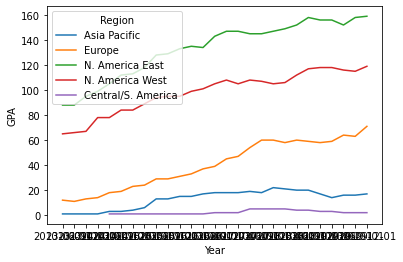

In [52]:
grouped_multiple = data.groupby(['Year', 'Region']).count()
grouped_multiple = grouped_multiple.reset_index()
a = grouped_multiple.copy()
a.drop(['Weigth', 'Rank', 'Name', 'City', 'G', 'Win', 'Los', 'City.1', 'CityCode', 'Country', 'City.1.1', 'CityCode.1', 'Country.1'] ,axis=1, inplace=True)
a
sns.lineplot(x='Year', y='GPA', data=a, hue='Region', markers=True) 

In [53]:
a.Year.value_counts()

2015-09-01    5
2018-09-01    5
2019-09-01    5
2015-06-01    5
2017-09-01    5
2015-03-01    5
2016-03-01    5
2016-12-01    5
2014-12-01    5
2017-12-01    5
2017-03-01    5
2019-06-01    5
2016-06-01    5
2017-06-01    5
2014-06-01    5
2019-12-01    5
2018-06-01    5
2015-12-01    5
2016-09-01    5
2014-09-01    5
2019-03-01    5
2018-12-01    5
2018-03-01    5
2013-09-01    4
2014-03-01    4
2013-12-01    4
2013-06-01    4
Name: Year, dtype: int64

In [54]:
df2 = pd.DataFrame([["2013-06-01","Central/S. America",0]], columns=['Year','Region','GPA'])
a = pd.concat([df2, a]) 
df2 = pd.DataFrame([["2013-12-01","Central/S. America",0]], columns=['Year','Region','GPA'])
a = pd.concat([df2, a]) 
df2 = pd.DataFrame([["2013-09-01","Central/S. America",0]], columns=['Year','Region','GPA'])
a = pd.concat([df2, a]) 
df2 = pd.DataFrame([["2014-03-01","Central/S. America",0]], columns=['Year','Region','GPA'])
a = pd.concat([df2, a]) 


In [55]:
a.Year = pd.to_datetime(a.Year, format='%Y-%m-%d')


In [56]:
a.reset_index(drop=True)

,Year,Region,GPA
0,2014-03-01,Central/S. America,0
1,2013-09-01,Central/S. America,0
2,2013-12-01,Central/S. America,0
3,2013-06-01,Central/S. America,0
4,2013-06-01,Asia Pacific,1
...,...,...,...
130,2019-12-01,Asia Pacific,17
131,2019-12-01,Central/S. America,2
132,2019-12-01,Europe,71
133,2019-12-01,N. America East,159


In [57]:
a.Year = pd.to_datetime(a.Year, format='%Y-%m-%d')

In [58]:
data_hist.loc[(data_hist.Name == "Rainy_City") & (data_hist.City_old == "Centralia, WA, US") , "Name"] = "Rainy_City_Roller_Dolls "

In [59]:
data_hist.loc[1656, :] #= 'Des_Moines 2'

GPA                       340.19
Weigth                      2.56
Rank                          55
Name                   Nashville
City_old       Nashville, TN, US
Region                N. America
G                             11
Win                            3
Los                            8
Year         2016-12-01 00:00:00
City                   Nashville
CityCode                      TN
Country                      USA
Longitude               -86.7744
Latitude                 36.1622
Name: 1656, dtype: object

In [46]:
data_hist.to_csv("../datasets/01-WFTDA-historical.csv")# Add the name of the file

In [47]:
a.to_csv("../datasets/01-timeseries.csv")# Add the name of the file

# GAMES 2019

In [48]:
game = pd.read_csv("../datasets/2- df_games_tableau.csv")# Add the name of the file
game.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
game

,Date,H_Team,V_Team,Tournament,WFTDA_H,WFTDA_V,City_Home,Region_Home,Longitude_Home,Latitude_Home,...,City_Visi,Region_Visi,Longitude_Visi,Latitude_Visi,Ranked_V,Dates,Class,YES,Country_Home,Maps
0,2019-02-16,Fernie_Roller_Derby,Gorge,0,Fernie,Gorge,"Fernie, BC, Canada",N. America,-115.062867,49.504175,...,"Hood River, OR, US",N. America,-121.512373,45.708790,1,NaN,NaN,NaN,Canada,"49.5042, -115.0629"
1,2019-02-16,Bellingham,Eves_Destruct,0,Bellingham,Eves_Destruct,"Bellingham, WA, US",N. America,-122.478836,48.754401,...,"Victoria, BC, Canada",N. America,-123.364953,48.428318,1,NaN,NaN,NaN,USA,"48.7544, -122.4788"
2,2019-02-16,Fernie_Roller_Derby,Bellingham,0,Fernie,Bellingham,"Fernie, BC, Canada",N. America,-115.062867,49.504175,...,"Bellingham, WA, US",N. America,-122.478836,48.754401,1,NaN,NaN,NaN,Canada,"49.5042, -115.0629"
3,2019-02-16,Gorge,Eves_Destruct,0,Gorge,Eves_Destruct,"Hood River, OR, US",N. America,-121.512373,45.708790,...,"Victoria, BC, Canada",N. America,-123.364953,48.428318,1,NaN,NaN,NaN,USA,"45.7088, -121.5124"
4,2019-02-16,Roc_City,Orangeville,0,Roc_City,Orangeville,"Rochester, NY, US",N. America,-77.615214,43.157285,...,"Orangeville, ON, Canada",N. America,-80.097375,43.919317,0,NaN,NaN,NaN,USA,"43.1573, -77.6152"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2019-11-23,Namur,Leeds,Skate_Around_Tour,Namur,Leeds,"Namur, Belgium",Europe,4.866189,50.466528,...,"Leeds, England",Europe,-1.543794,53.797419,1,11/23/19 - 11/24/19,Invitational,Skate_Around_Tour,Belgium,"50.4665, 4.8662"
1796,2019-11-23,Namur,Royal Swedish,Skate_Around_Tour,Namur,Royal_Swedish,"Namur, Belgium",Europe,4.866189,50.466528,...,"Stockholm, Sweden",Europe,18.071093,59.325117,1,11/23/19 - 11/24/19,Invitational,Skate_Around_Tour,Belgium,"50.4665, 4.8662"
1797,2019-11-23,Namur,Nantes,Skate_Around_Tour,Namur,Nantes,"Namur, Belgium",Europe,4.866189,50.466528,...,"Nantes, France",Europe,-1.554136,47.218637,1,11/23/19 - 11/24/19,Invitational,Skate_Around_Tour,Belgium,"50.4665, 4.8662"
1798,2019-11-23,Namur,Namur,Skate_Around_Tour,Namur,Namur,"Namur, Belgium",Europe,4.866189,50.466528,...,"Namur, Belgium",Europe,4.866189,50.466528,1,11/23/19 - 11/24/19,Invitational,Skate_Around_Tour,Belgium,"50.4665, 4.8662"


In [50]:
game.Date = pd.to_datetime(game.Date, format='%Y-%m-%d')

In [51]:
game['month'] = game.Date.apply(lambda x: x.month)
game['week'] = game.Date.apply(lambda x: x.week)
game['day_name'] = game.Date.apply(lambda x: x.dayofweek)

In [52]:
game.to_csv("../datasets/01-Games_.csv")# Add the name of the file

## Arenas 

In [53]:
mappin = {}
for a in iter(game.index):
    mappin[game.Maps[a]] = game.Region_Home[a]
mappin

{'49.5042, -115.0629': 'N. America',
 '48.7544, -122.4788': 'N. America',
 '45.7088, -121.5124': 'N. America',
 '43.1573, -77.6152': 'N. America',
 '43.6166, -116.2009': 'N. America',
 '38.5293, -76.9753': 'N. America',
 '49.1197, 6.1764': 'Europe',
 '40.6800, -122.3627': 'N. America',
 '43.0350, -87.9225': 'N. America',
 '42.7338, -84.5554': 'N. America',
 '40.1937, -85.3865': 'N. America',
 '50.9404, 0.3700': 'Europe',
 '44.2611, -88.4068': 'N. America',
 '40.4167, -3.7036': 'Europe',
 '53.3498, -6.2603': 'Europe',
 '42.2917, -85.5872': 'N. America',
 '47.2496, -122.4399': 'N. America',
 '50.8466, 4.3517': 'Europe',
 '52.3728, 4.8936': 'Europe',
 '35.0526, -78.8783': 'N. America',
 '37.5385, -77.4343': 'N. America',
 '30.2241, -92.0198': 'N. America',
 '38.8340, -104.8253': 'N. America',
 '40.1672, -105.1019': 'N. America',
 '33.1839, -97.1413': 'N. America',
 '40.0807, -76.2411': 'N. America',
 '41.9848, -88.0798': 'N. America',
 '41.0800, -85.1386': 'N. America',
 '36.1622, -86.774

In [54]:
home_arenas = game.Maps.value_counts().reset_index()
home_arenas.columns = ["Lat_Long" ,'Cantidad']
# Modify the CITY
home_arenas =  pd.concat([home_arenas,(pd.DataFrame(home_arenas.Lat_Long.str.split(',').tolist(), columns = ['Latitude','Longitude']))], axis =1)
home_arenas["Region"] = home_arenas["Lat_Long"].replace(mappin)

In [55]:
home_arenas

,Lat_Long,Cantidad,Latitude,Longitude,Region
0,"40.1582, -75.0152",53,40.1582,-75.0152,N. America
1,"44.0505, -123.0951",48,44.0505,-123.0951,N. America
2,"48.8567, 2.3515",46,48.8567,2.3515,Europe
3,"45.4972, -73.6104",44,45.4972,-73.6104,N. America
4,"60.1674, 24.9426",42,60.1674,24.9426,Europe
...,...,...,...,...,...
327,"41.5538, -73.0438",1,41.5538,-73.0438,N. America
328,"-41.2888, 174.7772",1,-41.2888,174.7772,Asia Pacific
329,"42.5083, -89.0318",1,42.5083,-89.0318,N. America
330,"40.7127, -74.0060",1,40.7127,-74.0060,N. America


In [56]:
oth = home_arenas.merge(game, left_on='Lat_Long', right_on='Maps')

In [57]:
oth.drop([ 'Ranked_H',  'City_Visi', 'Region_Visi', 'Longitude_Visi', 
                  'Latitude_Visi',  'Ranked_V', 'Dates', 'Class', 'YES', 'Region_Home', 'Longitude_Home', 'Latitude_Home', 'Maps' ], axis=1, inplace=True)

In [58]:
oth.columns #= ['Lat_Long', 'Cantidad', 'Latitude', 'Longitude', 'Region', 'H_Team', 'WFTDA_H',  'City_Home', 'Country_Home']


Index(['Lat_Long', 'Cantidad', 'Latitude', 'Longitude', 'Region', 'Date',
       'H_Team', 'V_Team', 'Tournament', 'WFTDA_H', 'WFTDA_V', 'City_Home',
       'Country_Home', 'month', 'week', 'day_name'],
      dtype='object')

In [59]:
oth

,Lat_Long,Cantidad,Latitude,Longitude,Region,Date,H_Team,V_Team,Tournament,WFTDA_H,WFTDA_V,City_Home,Country_Home,month,week,day_name
0,"40.1582, -75.0152",53,40.1582,-75.0152,N. America,2019-06-21,Philly,Atlanta,ECDX,Philly,Atlanta,"Feasterville, PA, US",USA,6,25,4
1,"40.1582, -75.0152",53,40.1582,-75.0152,N. America,2019-06-21,Philly,Paris,ECDX,Philly,Paris,"Feasterville, PA, US",USA,6,25,4
2,"40.1582, -75.0152",53,40.1582,-75.0152,N. America,2019-06-21,Philly,Charlottesville,ECDX,Philly,Charlottesville,"Feasterville, PA, US",USA,6,25,4
3,"40.1582, -75.0152",53,40.1582,-75.0152,N. America,2019-06-21,Philly,Jet City,ECDX,Philly,Jet_City,"Feasterville, PA, US",USA,6,25,4
4,"40.1582, -75.0152",53,40.1582,-75.0152,N. America,2019-06-21,Philly,Bear City,ECDX,Philly,Bear_City,"Feasterville, PA, US",USA,6,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,"41.5538, -73.0438",1,41.5538,-73.0438,N. America,2019-05-11,Connecticut,Maine,0,Connecticut,Maine,"Waterbury, CT, US",USA,5,19,5
1796,"-41.2888, 174.7772",1,-41.2888,174.7772,Asia Pacific,2019-06-29,Richter_City,Dunedin,0,Richter_City,Dunedin,"Wellington, New Zealand",New Zealand,6,26,5
1797,"42.5083, -89.0318",1,42.5083,-89.0318,N. America,2019-04-27,Beloit_Bombshells,Keweenaw,0,Beloit,Keweenaw,"Beloit, WI, US",USA,4,17,5
1798,"40.7127, -74.0060",1,40.7127,-74.0060,N. America,2019-08-17,Gotham,Montréal,0,Gotham,Montréal,"New York City, NY, US",USA,8,33,5


In [60]:
home_arenas.Longitude = home_arenas.Longitude.str.strip().astype("float")
home_arenas.Latitude = home_arenas.Latitude.str.strip().astype("float")

In [61]:
home_arenas.loc[(home_arenas.Lat_Long == "-30.5344, 135.6301"), "Region"] = 'Asia Pacific'

In [62]:
home_arenas

,Lat_Long,Cantidad,Latitude,Longitude,Region
0,"40.1582, -75.0152",53,40.1582,-75.0152,N. America
1,"44.0505, -123.0951",48,44.0505,-123.0951,N. America
2,"48.8567, 2.3515",46,48.8567,2.3515,Europe
3,"45.4972, -73.6104",44,45.4972,-73.6104,N. America
4,"60.1674, 24.9426",42,60.1674,24.9426,Europe
...,...,...,...,...,...
327,"41.5538, -73.0438",1,41.5538,-73.0438,N. America
328,"-41.2888, 174.7772",1,-41.2888,174.7772,Asia Pacific
329,"42.5083, -89.0318",1,42.5083,-89.0318,N. America
330,"40.7127, -74.0060",1,40.7127,-74.0060,N. America


In [63]:
home_arenas.to_csv("../datasets/01-HomeArenas.csv")# Add the name of the file